In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('/content/deepseek_gpt_claude_annotation.tsv', sep='\t')
df1.head()

,file,segment,sentences,DeepSeek_dim1,DeepSeek_dim2,DeepSeek_dim4,GPT-4o_dim1,GPT-4o_dim2,GPT-4o_dim4,Claude_dim1,Claude_dim2,Claude_dim4
0,2020_MLa_100_2.docx,Introductory material,There is an opinion that watching sports on te...,H,L,H,H,H,H,H,H,H
1,2020_MLa_100_2.docx,Thesis,"In my opinion, there is some truth in it, but ...",H,H,H,H,H,L,H,H,L
2,2020_MLa_100_2.docx,Argument,"First of all, I'll try to explain why I think ...",H,H,L,H,H,L,H,H,H
3,2020_MLa_100_2.docx,Elaboration,All of us have their leisure time and there is...,H,L,H,L,L,L,H,L,H
4,2020_MLa_100_2.docx,Elaboration,"Therefore, when you have nothing to do or you ...",H,H,H,H,H,H,H,H,H


In [11]:
df2 = pd.read_csv('/content/deepseek_gpt_annotation_dim3.tsv', sep='\t')
df2.head()

,Previous clause,Previous clause label,Target clause,Target clause label,Number of the target clause in a sentence,Annotation_DeepSeek,Annotation_gpt,Annotation_Claude
0,NaN,NaN,"('All of us have their leisure time', 'root')",Elaboration,1,0,0,0
1,"('All of us have their leisure time', 'root')",Elaboration,"('and there is no secret', 'conj')",Elaboration,2,H,H,H
2,"('and there is no secret', 'conj')",Elaboration,('that a lot of us like some kind of sport act...,Elaboration,3,H,H,H
3,('that a lot of us like some kind of sport act...,Elaboration,"('Also there is one more bad thing', 'root')",Argument,1,0,0,0
4,"('Also there is one more bad thing', 'root')",Argument,"('you can be dragged', 'acl:relcl')",Argument,2,L,H,H


In [13]:
dimensions = ['dim1', 'dim2', 'dim3', 'dim4']
models = ['DeepSeek', 'GPT-4o', 'Claude']

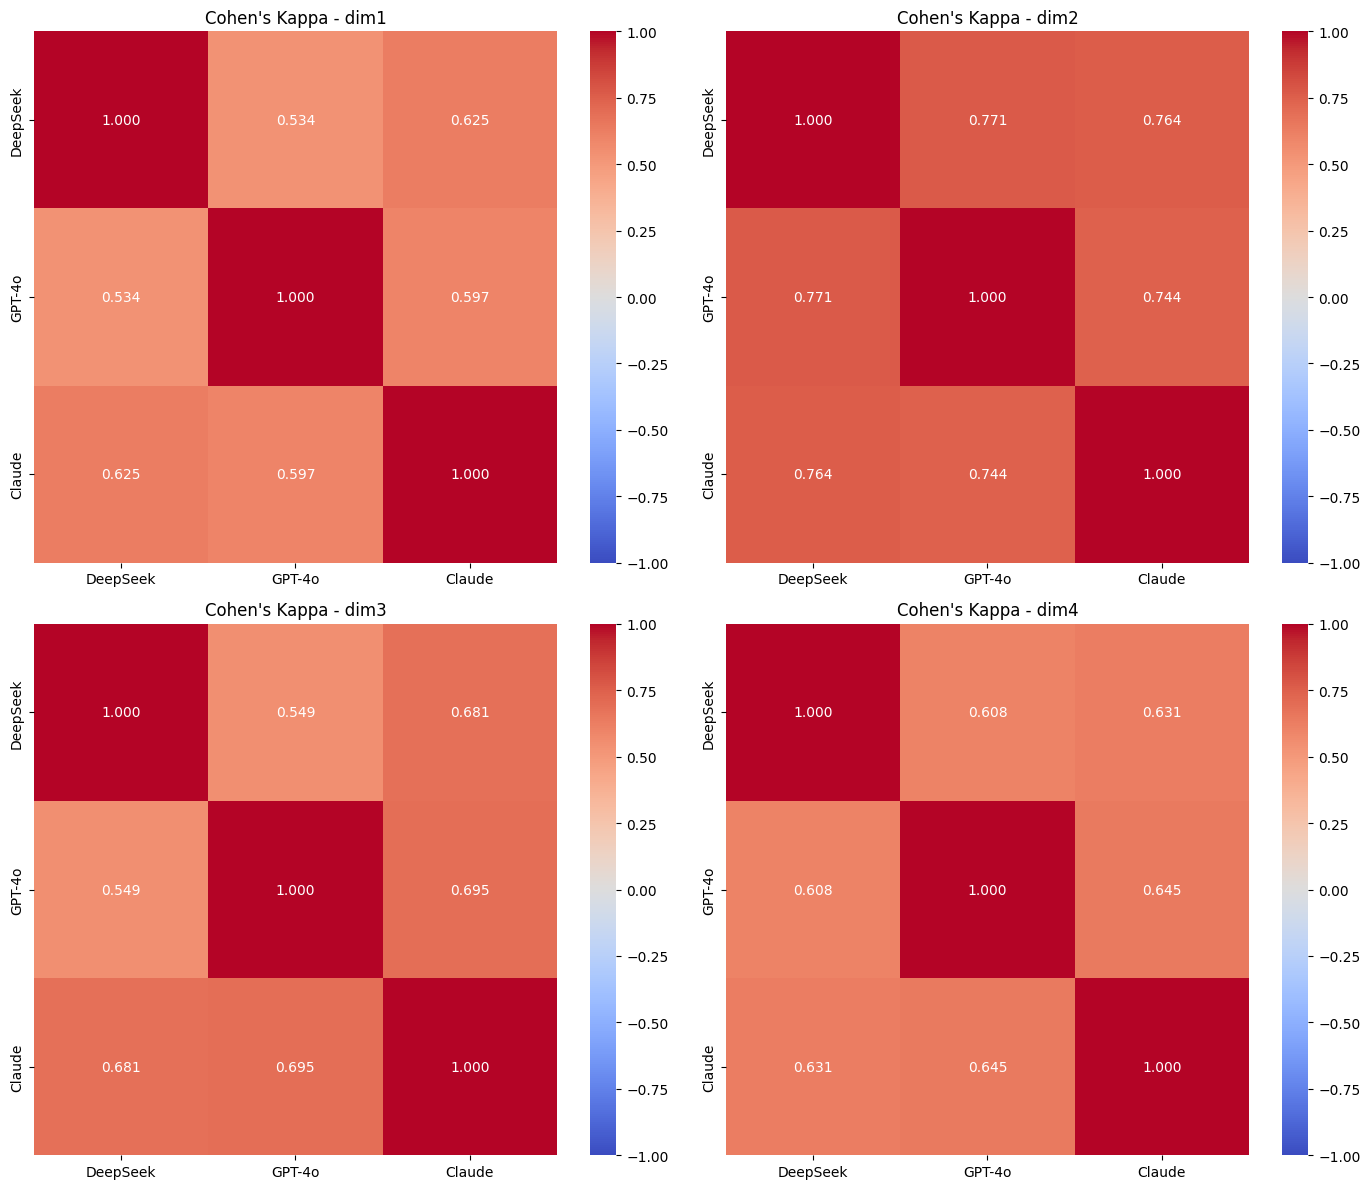

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()
for idx, dim in enumerate(dimensions):
    if dim == 'dim3':
        cols = ['Annotation_DeepSeek', 'Annotation_gpt', 'Annotation_Claude']
        data_source = df2
    else:
        cols = [f'{model}_{dim}' for model in models]
        data_source = df1
    kappa_matrix = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            if i == j:
                kappa_matrix[i, j] = 1.0
            else:
                kappa = cohen_kappa_score(data_source[cols[i]], data_source[cols[j]])
                kappa_matrix[i, j] = kappa
    sns.heatmap(kappa_matrix, annot=True, fmt='.3f', cmap='coolwarm',
                xticklabels=models, yticklabels=models, vmin=-1, vmax=1,
                ax=axes[idx])
    axes[idx].set_title(f"Cohen's Kappa - {dim}")
plt.tight_layout()
plt.show()